<a href="https://colab.research.google.com/github/taianecbassis/pollutant-salvador-ba/blob/main/ssa_data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing required python packages***

In [3]:
from platform import python_version
print ('Python version used in this Jupyter Nootbook:', python_version())

Python version used in this Jupyter Nootbook: 3.10.12


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
#drive.mount('/content/drive')



***Data preview and general check***



In [5]:
dfssa_cab = pd.read_excel('/content/drive/MyDrive/Mestrado/Dados/DADOS BRUTOS/dados_SSA_CAB.xlsx')


In [6]:
dfssa_cab.head()

,Data_CAB,Hora_CAB,SO2_CAB,CO_CAB,O3_CAB,MP_CAB,NO_CAB,NOX_CAB,NO2_CAB,VEL_VENTO_CAB,DIR_VENTO_CAB,TEMP_CAB,UMID_CAB,STWD_CAB,Unnamed: 14
0,1/1/2011,1,0.4,0.48,13.6,26.3,114.61,122.19,7.59,3.4,135,25.7,83,13.1,NaN
1,1/1/2011,2,0.5,0.57,13.7,23.6,122.64,131.69,9.05,3.8,131,25.6,82,13.9,NaN
2,1/1/2011,3,0.5,0.64,12.5,23.6,123.62,134.72,11.09,3.1,128,25.4,83,11.6,NaN
3,1/1/2011,4,0.6,0.72,8.2,22.9,154.94,164.36,9.42,1.5,127,25.1,86,20.9,NaN
4,1/1/2011,5,0.4,0.69,6.6,23,169.24,177.21,7.99,1.3,119,25,87,19.2,NaN


In [7]:
dfssa_cab.tail()

,Data_CAB,Hora_CAB,SO2_CAB,CO_CAB,O3_CAB,MP_CAB,NO_CAB,NOX_CAB,NO2_CAB,VEL_VENTO_CAB,DIR_VENTO_CAB,TEMP_CAB,UMID_CAB,STWD_CAB,Unnamed: 14
52603,31/12/2016,20,0.3,0.35,7,25.7,25.15,42.15,17.17,2.9,104,26.8,72,19.5,0
52604,31/12/2016,21,0.2,0.33,7.2,19.7,25.23,41.01,15.78,2.8,101,26.6,73,19.3,0
52605,31/12/2016,22,0.2,0.38,7.1,19.6,31.56,50.29,18.76,2.6,104,26.7,75,19.6,0
52606,31/12/2016,23,0.3,0.34,7.7,11.5,20.06,35.86,16.05,2.9,101,26.4,76,17.9,0
52607,31/12/2016,24,0.5,0.32,8.2,7.6,13.1,26.05,13.54,2.9,96,26,78,16.9,0


In [8]:
dfssa_cab = dfssa_cab.drop(dfssa_cab.columns[14], axis=1)
dfssa_cab.columns

Index(['Data_CAB', 'Hora_CAB', 'SO2_CAB', 'CO_CAB', 'O3_CAB', 'MP_CAB',
       'NO_CAB', 'NOX_CAB', 'NO2_CAB', 'VEL_VENTO_CAB', 'DIR_VENTO_CAB',
       'TEMP_CAB', 'UMID_CAB', 'STWD_CAB'],
      dtype='object')



***Data preprocessing***

In [9]:
#Converting the Data_CAB column into the datetime type and Hora_CAB column into the timedelta type
dfssa_cab['Data_CAB'] = pd.to_datetime(dfssa_cab['Data_CAB'], format = '%d/%m/%Y')
dfssa_cab['Hora_CAB'] = pd.to_timedelta(dfssa_cab['Hora_CAB'], unit= 'h')

In [10]:
print(dfssa_cab['Data_CAB'])
print()
print(dfssa_cab['Hora_CAB'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
52603   2016-12-31
52604   2016-12-31
52605   2016-12-31
52606   2016-12-31
52607   2016-12-31
Name: Data_CAB, Length: 52608, dtype: datetime64[ns]

0       0 days 01:00:00
1       0 days 02:00:00
2       0 days 03:00:00
3       0 days 04:00:00
4       0 days 05:00:00
              ...      
52603   0 days 20:00:00
52604   0 days 21:00:00
52605   0 days 22:00:00
52606   0 days 23:00:00
52607   1 days 00:00:00
Name: Hora_CAB, Length: 52608, dtype: timedelta64[ns]


In [11]:
#Concatenate the Data_CAB and Hora_CAB columns into the date_time column
#Converting the dataframe into a time series with the date_time column as index and defining the frequency type as hourly
dfssa_cab['Date_time'] = dfssa_cab['Data_CAB'] + dfssa_cab['Hora_CAB']
dfssa_cab = dfssa_cab.set_index('Date_time')
dfssa_cab = dfssa_cab.asfreq(freq='H')
#dfssa_cab = dfssa_cab.drop(['Data_CAB','Hora_CAB'], axis=1)
print(dfssa_cab.head())

                      Data_CAB        Hora_CAB SO2_CAB CO_CAB O3_CAB MP_CAB  \
Date_time                                                                     
2011-01-01 01:00:00 2011-01-01 0 days 01:00:00     0.4   0.48   13.6   26.3   
2011-01-01 02:00:00 2011-01-01 0 days 02:00:00     0.5   0.57   13.7   23.6   
2011-01-01 03:00:00 2011-01-01 0 days 03:00:00     0.5   0.64   12.5   23.6   
2011-01-01 04:00:00 2011-01-01 0 days 04:00:00     0.6   0.72    8.2   22.9   
2011-01-01 05:00:00 2011-01-01 0 days 05:00:00     0.4   0.69    6.6     23   

                     NO_CAB NOX_CAB NO2_CAB VEL_VENTO_CAB DIR_VENTO_CAB  \
Date_time                                                                 
2011-01-01 01:00:00  114.61  122.19    7.59           3.4           135   
2011-01-01 02:00:00  122.64  131.69    9.05           3.8           131   
2011-01-01 03:00:00  123.62  134.72   11.09           3.1           128   
2011-01-01 04:00:00  154.94  164.36    9.42           1.5           127

In [12]:
dfssa_cab.dtypes

Data_CAB          datetime64[ns]
Hora_CAB         timedelta64[ns]
SO2_CAB                   object
CO_CAB                    object
O3_CAB                    object
MP_CAB                    object
NO_CAB                    object
NOX_CAB                   object
NO2_CAB                   object
VEL_VENTO_CAB             object
DIR_VENTO_CAB             object
TEMP_CAB                  object
UMID_CAB                  object
STWD_CAB                  object
dtype: object

In [13]:
#Converting Dataframe to float type
interv_clmn = dfssa_cab.columns[2:14]
for coluna in interv_clmn:
  dfssa_cab[coluna] = pd.to_numeric(dfssa_cab[coluna], errors= 'coerce')
dfssa_cab.dtypes

Data_CAB          datetime64[ns]
Hora_CAB         timedelta64[ns]
SO2_CAB                  float64
CO_CAB                   float64
O3_CAB                   float64
MP_CAB                   float64
NO_CAB                   float64
NOX_CAB                  float64
NO2_CAB                  float64
VEL_VENTO_CAB            float64
DIR_VENTO_CAB            float64
TEMP_CAB                 float64
UMID_CAB                 float64
STWD_CAB                 float64
dtype: object

In [14]:
dfssa_cab.head()

,Data_CAB,Hora_CAB,SO2_CAB,CO_CAB,O3_CAB,MP_CAB,NO_CAB,NOX_CAB,NO2_CAB,VEL_VENTO_CAB,DIR_VENTO_CAB,TEMP_CAB,UMID_CAB,STWD_CAB
Date_time,,,,,,,,,,,,,,
2011-01-01 01:00:00,2011-01-01,0 days 01:00:00,0.4,0.48,13.6,26.3,114.61,122.19,7.59,3.4,135.0,25.7,83.0,13.1
2011-01-01 02:00:00,2011-01-01,0 days 02:00:00,0.5,0.57,13.7,23.6,122.64,131.69,9.05,3.8,131.0,25.6,82.0,13.9
2011-01-01 03:00:00,2011-01-01,0 days 03:00:00,0.5,0.64,12.5,23.6,123.62,134.72,11.09,3.1,128.0,25.4,83.0,11.6
2011-01-01 04:00:00,2011-01-01,0 days 04:00:00,0.6,0.72,8.2,22.9,154.94,164.36,9.42,1.5,127.0,25.1,86.0,20.9
2011-01-01 05:00:00,2011-01-01,0 days 05:00:00,0.4,0.69,6.6,23.0,169.24,177.21,7.99,1.3,119.0,25.0,87.0,19.2


In [15]:
# Viewing and handling missing values
dfssa_cab.isnull().sum()

Data_CAB            0
Hora_CAB            0
SO2_CAB          2296
CO_CAB           2264
O3_CAB            671
MP_CAB           4485
NO_CAB           2263
NOX_CAB          2263
NO2_CAB          2250
VEL_VENTO_CAB    2698
DIR_VENTO_CAB    1128
TEMP_CAB          337
UMID_CAB          331
STWD_CAB         2561
dtype: int64

In [16]:
dfssa_cab.isnull().sum() / dfssa_cab.shape[0]

Data_CAB         0.000000
Hora_CAB         0.000000
SO2_CAB          0.043644
CO_CAB           0.043035
O3_CAB           0.012755
MP_CAB           0.085253
NO_CAB           0.043016
NOX_CAB          0.043016
NO2_CAB          0.042769
VEL_VENTO_CAB    0.051285
DIR_VENTO_CAB    0.021442
TEMP_CAB         0.006406
UMID_CAB         0.006292
STWD_CAB         0.048681
dtype: float64

In [17]:
#   MP_10 = dfssa_cab['MP_CAB'].loc['2011-01-01 01:00:00':'2016-12-31 00:00:00']
#   MP_10.plot(figsize=(12, 6), color='#BB8787')
#   plt.title('Variação das concentrações de MP10 - 2011 a 2016')
#   plt.xlabel('Data e Hora')
#   plt.ylabel('Concentração MP10')
#   plt.grid(True, alpha=0.4)
#   plt.show()

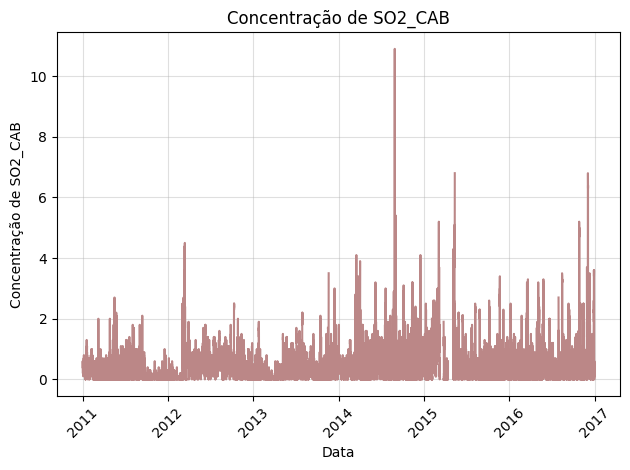

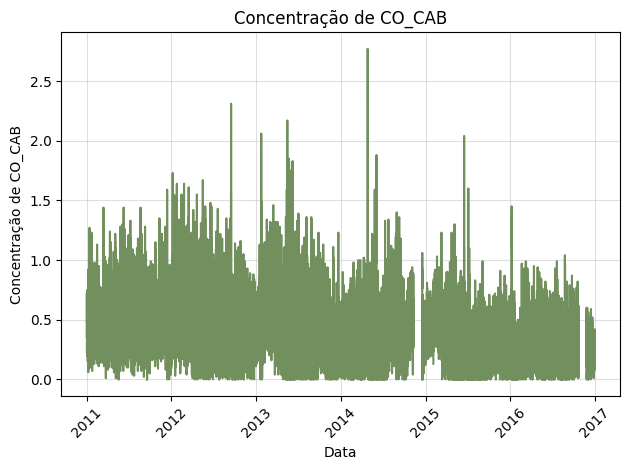

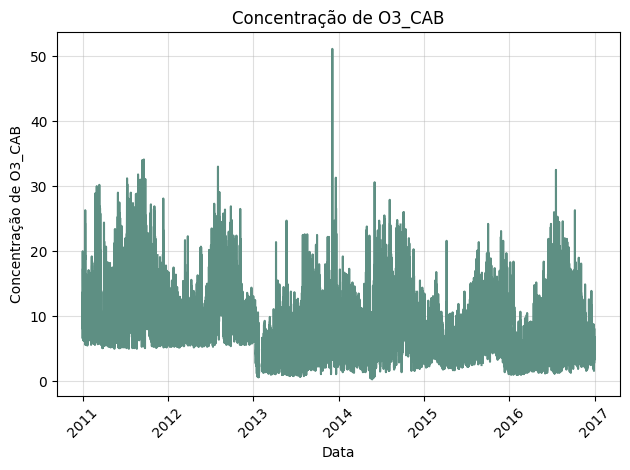

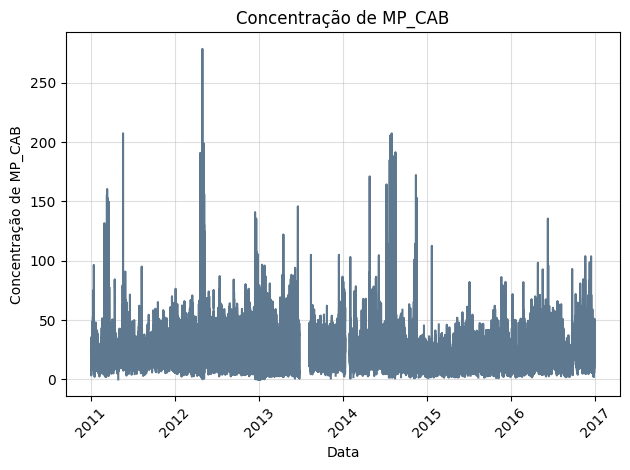

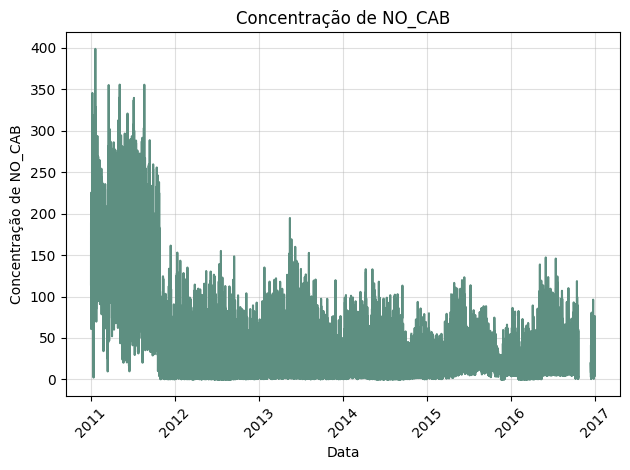

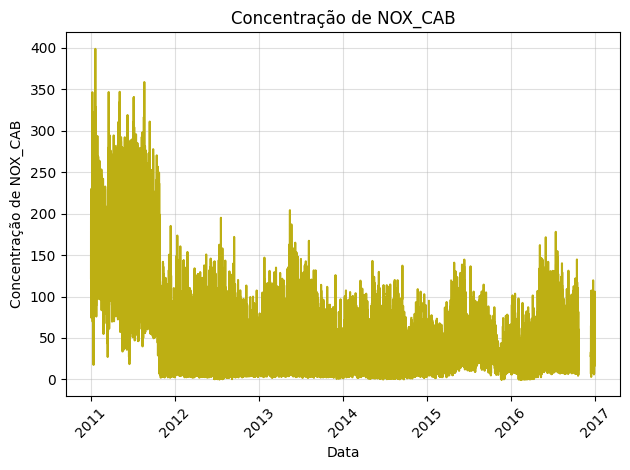

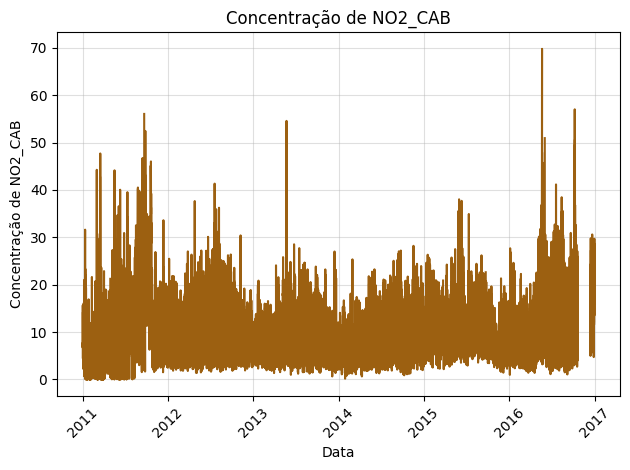

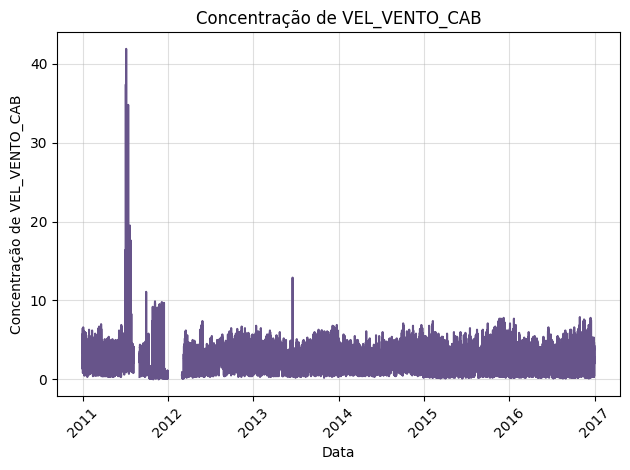

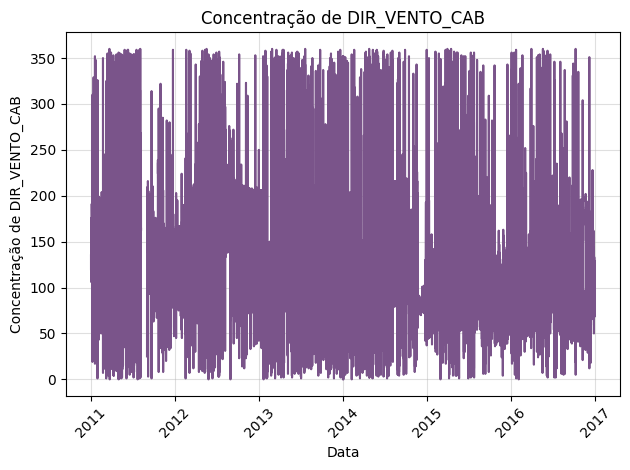

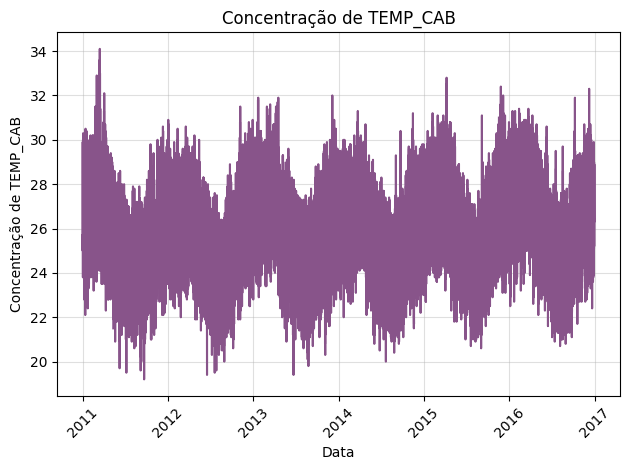

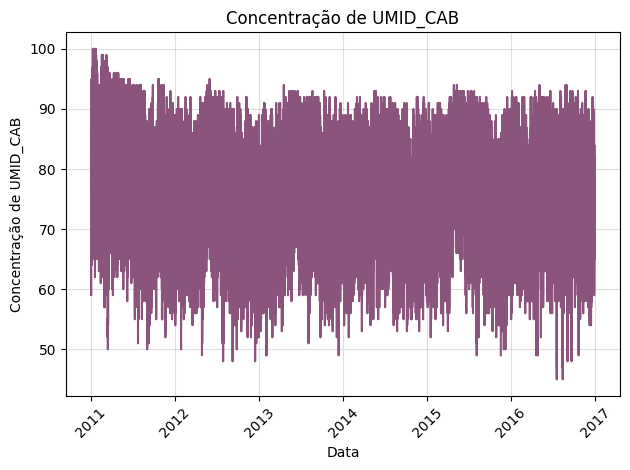

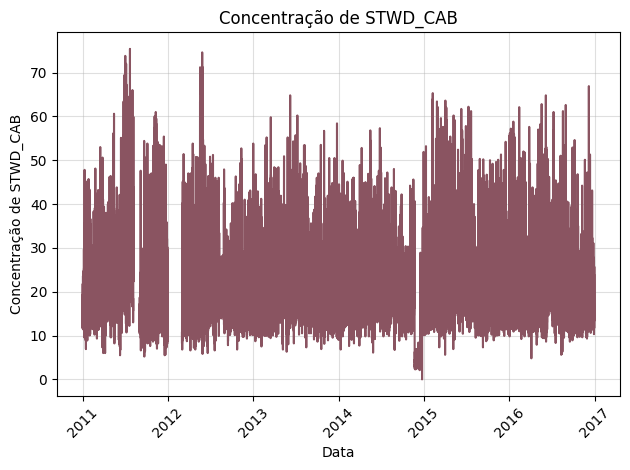

In [18]:
from itertools import cycle
# Viewing time series with missing values

dfssa = dfssa_cab.loc['2011-01-01 01:00:00':'2016-12-30 00:00:00']

cor = cycle(['#BB8787','#728f5e','#5e8f83','#5e788f','#5e8f81','#bdaf13',
       '#9c6011','#67548a','#7a548a','#88548a','#8a547c','#8a5461'])

interv_clmn = dfssa.columns[2:14]

for coluna, cor in zip(interv_clmn, cor):
  plt.figure()
  plt.plot(dfssa.index, dfssa[coluna], color=cor)
  plt.title(f'Concentração de {coluna}')
  plt.xlabel('Data')
  plt.ylabel(f'Concentração de {coluna}')
  plt.grid(True, alpha=0.4)
  plt.xticks(rotation=45)
  plt.tight_layout()  # Ajustar layout para evitar cortar rótulos
  plt.show()

In [ ]:
dfssa_cab.set_index('Data_CAB').isna().sum(level=0)